# Mechanical Vibrations with Python [updated]

Thanks to a comment I had the equation for xdd incorrect, but has been updated, thanks guest

Solving second-order differential equations is a common problem in mechanical engineering, and although it is improtant to understand how to solve these problems analytically, using software to solve them is mor practical, especially when considering the parameters are often unknown and need to be tested. 

This is a simple example of solving a second-order differential equation representing a spring-damper system with python programming language. Python is a powerful tool for science and engineering and is relativley easy to use and free!

The system that this is modeling is based on a spring and damper in parallel attached to a mass.

![Mass_spring_damper](http://upload.wikimedia.org/wikipedia/en/7/79/Mass_spring_damper.png)

Since python is a generic programming language, certain specialized modules need to be imported for math operations and plotting 

In [1]:
import matplotlib.pyplot as plt

# forces plots to appear in the ipython notebook
%matplotlib inline

from scipy.integrate import odeint

from numpy import cos, pi, arange, sqrt, pi, array, array, exp

The system is represented as a python function, ```MassSpringDamper```. The parameters can be easily adjusted to by changing the variables within this function

In [2]:
def MassSpringDamper_forced(state,t):
    '''
    k=spring constant, Newtons per metre
    m=mass, Kilograms
    c=dampign coefficient, Newton*second / meter    
    
    for a mass,spring
        xdd = ((-k*x)/m) + g
    for a mass, spring, damper 
        xdd = -k*x/m -c*xd/m - g
    for a mass, spring, dmaper with forcing function
        xdd = -k*x/m - c*xd/m-g + cos(4*t-pi/4)/m
    '''
  
    k=1e3  # spring constant, kN/m
    m=10 # mass, Kg
    c=10  # damping coefficient 
    # unpack the state vector
    x,xd = state # displacement,x and velocity x'
    g = 9.8 # metres per second**2
    # compute acceleration xdd = x''
    omega = 10.0 # frequency
    phi = 0 # phase shift
    A = 100.0 # amplitude
    xdd = -k*x/m -c*xd/m - g + A*cos(2*pi*omega*t - phi)/m
    return [xd, xdd]


In [3]:
def MassSpringDamper(state,t):
    '''
    k=spring constant, Newtons per metre
    m=mass, Kilograms
    c=dampign coefficient, Newton*second / meter    
    
    for a mass,spring
        xdd = ((-k*x)/m) + g
    for a mass, spring, damper 
        xdd = -k*x/m -c*xd/m - g
    for a mass, spring, dmaper with forcing function
        xdd = -k*x/m - c*xd/m-g + cos(4*t-pi/4)/m
    '''
  
    k=1e3  # spring constant, kN/m
    m=10 # mass, Kg
    c=10  # damping coefficient 
    # unpack the state vector
    x,xd = state # displacement,x and velocity x'
    g = 9.8 # metres per second**2
    # compute acceleration xdd = x''
    omega = 10.0 # frequency
    phi = 0 # phase shift
    A = 100.0 # amplitude
    xdd = -k*x/m -c*xd/m - g
    return [xd, xdd]

The initial displacement and velocity conditions are defined in the varaible ```state0```

note the natrual frequency is close to the value we selected

In [6]:
state0 = [0.0, 0.0]  #initial conditions [x0 , v0]  [m, m/sec] 
ti = 0.0  # initial time
tf = 7  # final time
step = 0.001  # step
t = arange(ti, tf, step)
state = odeint(MassSpringDamper, state0, t)
x = array(state[:,[0]])
xd = array(state[:,[1]])

Solving a differential equation is challenging enough, but for me, it isn't all that useful unless you have some nice plots to visualize the results

In [7]:
# Analytical solution

k_ = 1e3  # spring constant, kN/m
m_ = 10 # mass, Kg
c_ = 10 # damping coefficient 
A = 100 # amplitude 
omega = 4 # frequency Hz
phi = 0 # phase shift
x_analytical = A*exp(-c_*t/(2*m_))*cos(omega*t+phi)

In [8]:
sqrt(k_/m_)

10.0

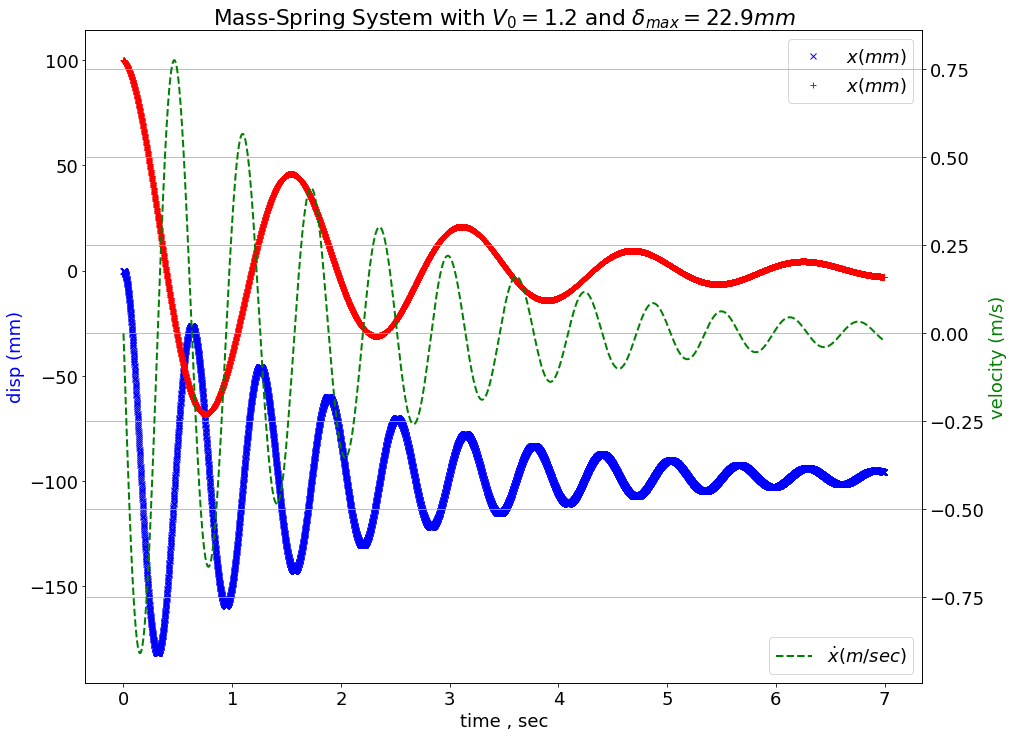

In [10]:
# Plotting displacement and velocity
plt.rcParams['figure.figsize'] = (15, 12)
plt.rcParams['font.size'] = 18

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.plot(t,x,           'bx',label = r'$x (mm)$', linewidth=2.0)
ax1.plot(t,x_analytical,'r+',label = r'$x (mm)$', linewidth=2.0)
ax2.plot(t,xd,'g--',label = r'$\dot{x} (m/sec)$', linewidth=2.0)
ax2.legend(loc='lower right')
ax1.legend()
ax1.set_xlabel('time , sec')
ax1.set_ylabel('disp (mm)',color='b')
ax2.set_ylabel('velocity (m/s)',color='g')
plt.title('Mass-Spring System with $V_0=1.2 \frac{m}{s}$ and $\delta_{max}=22.9mm$')
plt.grid()